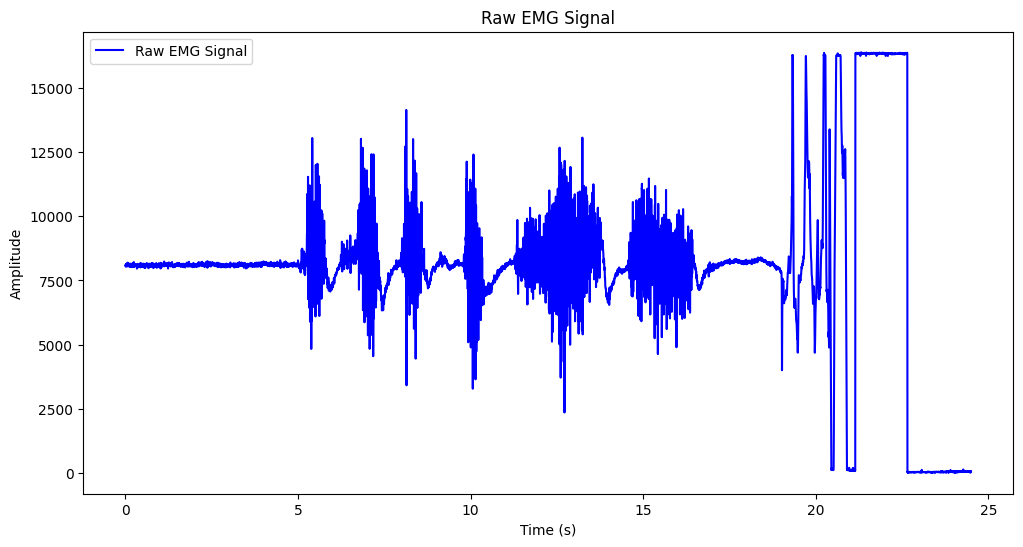

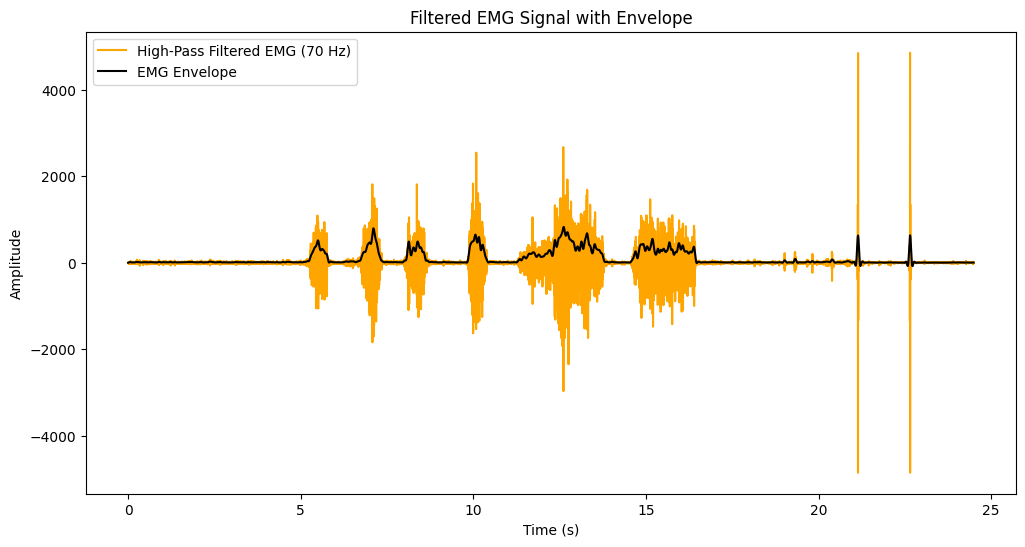

In [45]:
# Import necessary libraries
import pandas as pd
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Load and Clean the EMG Data
csv_file = 'emg_sample.csv'
emg_data = pd.read_csv(csv_file)  # Read the EMG data from CSV
emg_signal = nk.emg_clean(emg_data['Channel1'], sampling_rate=500)  # Clean the raw EMG signal using NeuroKit2's cleaning function

# Define a time array for plotting
time = np.arange(len(emg_signal)) / 500  # Create a time array (in seconds)

# Plot the raw EMG data
plt.figure(figsize=(12, 6))
plt.plot(time, emg_data['Channel1'], label='Raw EMG Signal', color='blue')
plt.title('Raw EMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Apply a High-Pass Filter at 70 Hz
def highpass_filter(signal, cutoff=70, fs=500, order=4):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyquist  # Normalize cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# Filter the cleaned EMG signal with a high-pass filter
emg_filtered = highpass_filter(emg_signal, cutoff=70, fs=500)

# EMG Envelope
def plot_emg_envelope(emg_signal, fs=500):
    """
    Plot the high-pass filtered EMG signal and its envelope.
    """

    absolute_signal = np.abs(emg_signal)
    
    # Apply a low-pass filter of 10 Hz to get the envelope
    cutoff = 10
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(4, normal_cutoff, btype='low', analog=False)
    emg_envelope = filtfilt(b, a, absolute_signal)

    # Plot the high-pass filtered EMG signal and its envelope
    plt.figure(figsize=(12, 6))
    plt.plot(time, emg_signal, label='High-Pass Filtered EMG (70 Hz)', color='orange')
    plt.plot(time, emg_envelope, label='EMG Envelope', color='black')
    plt.title('Filtered EMG Signal with Envelope')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Plot the EMG envelope
plot_emg_envelope(emg_signal)